In [1]:

import time
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, maxabs_scale, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, classification_report,confusion_matrix,mean_squared_error 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import time
import datetime

In [4]:
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['event_date'])
df['event_description'].fillna(value='', inplace=True)

df_country_Vietnam = df.loc[lambda df: df['country_name'] == 'Vietnam', :].loc[:, ['event_date',"longitude", "latitude"]].sort_values("event_date")
df_country_Vietnam.head(5)

,event_date,longitude,latitude
5958,2007-07-01,107.2930,21.0233
5260,2007-10-05,105.3500,20.0400
6592,2007-10-05,103.9000,21.3167
4286,2007-10-15,107.9408,15.6045
1701,2007-10-30,107.9660,15.5946


[Text(0.5, 1.0, 'tại Hoa Kỳ'),
 Text(0.5, 0, 'Tháng'),
 Text(0, 0.5, 'Số lượng sự kiện sạt lở')]

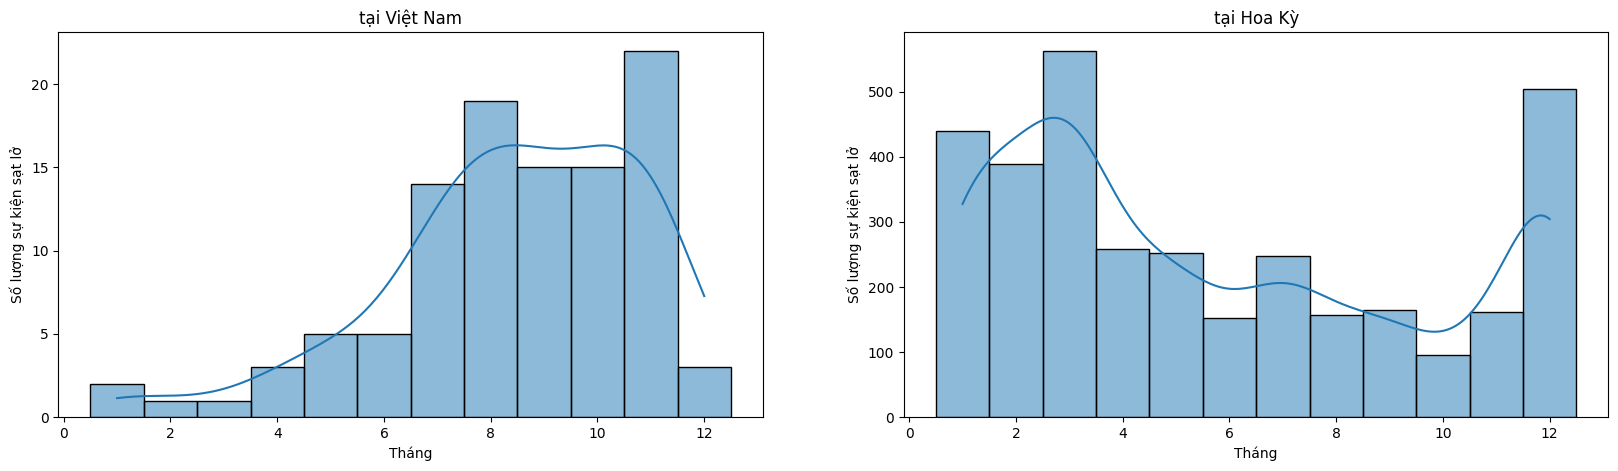

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
bins = np.arange(13) + 0.5
sns.histplot(x=df.loc[lambda df: df['country_name'] == 'Vietnam', :].loc[:, ['country_name', 'event_date']]['event_date'].dt.month, kde=True, bins=bins, ax=ax[0]).set(title='tại Việt Nam', xlabel='Tháng', ylabel='Số lượng sự kiện sạt lở')
sns.histplot(x=df.loc[lambda df: df['country_name'] == 'United States', :].loc[:, ['country_name', 'event_date']]['event_date'].dt.month, kde=True, bins=bins, ax=ax[1]).set(title='tại Hoa Kỳ', xlabel='Tháng', ylabel='Số lượng sự kiện sạt lở')


In [6]:
df_2007 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2007])]
df_2008 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2008])]
df_2009 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2009])]
df_2010 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2010])]
df_2011 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2011])]
df_2012 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2012])]
df_2013 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2013])]
df_2014 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2014])]
df_2015 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2015])]
df_2016 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2016])]
df_2017 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2017])]
df_year = [df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017]
list_year = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","016","2017"]

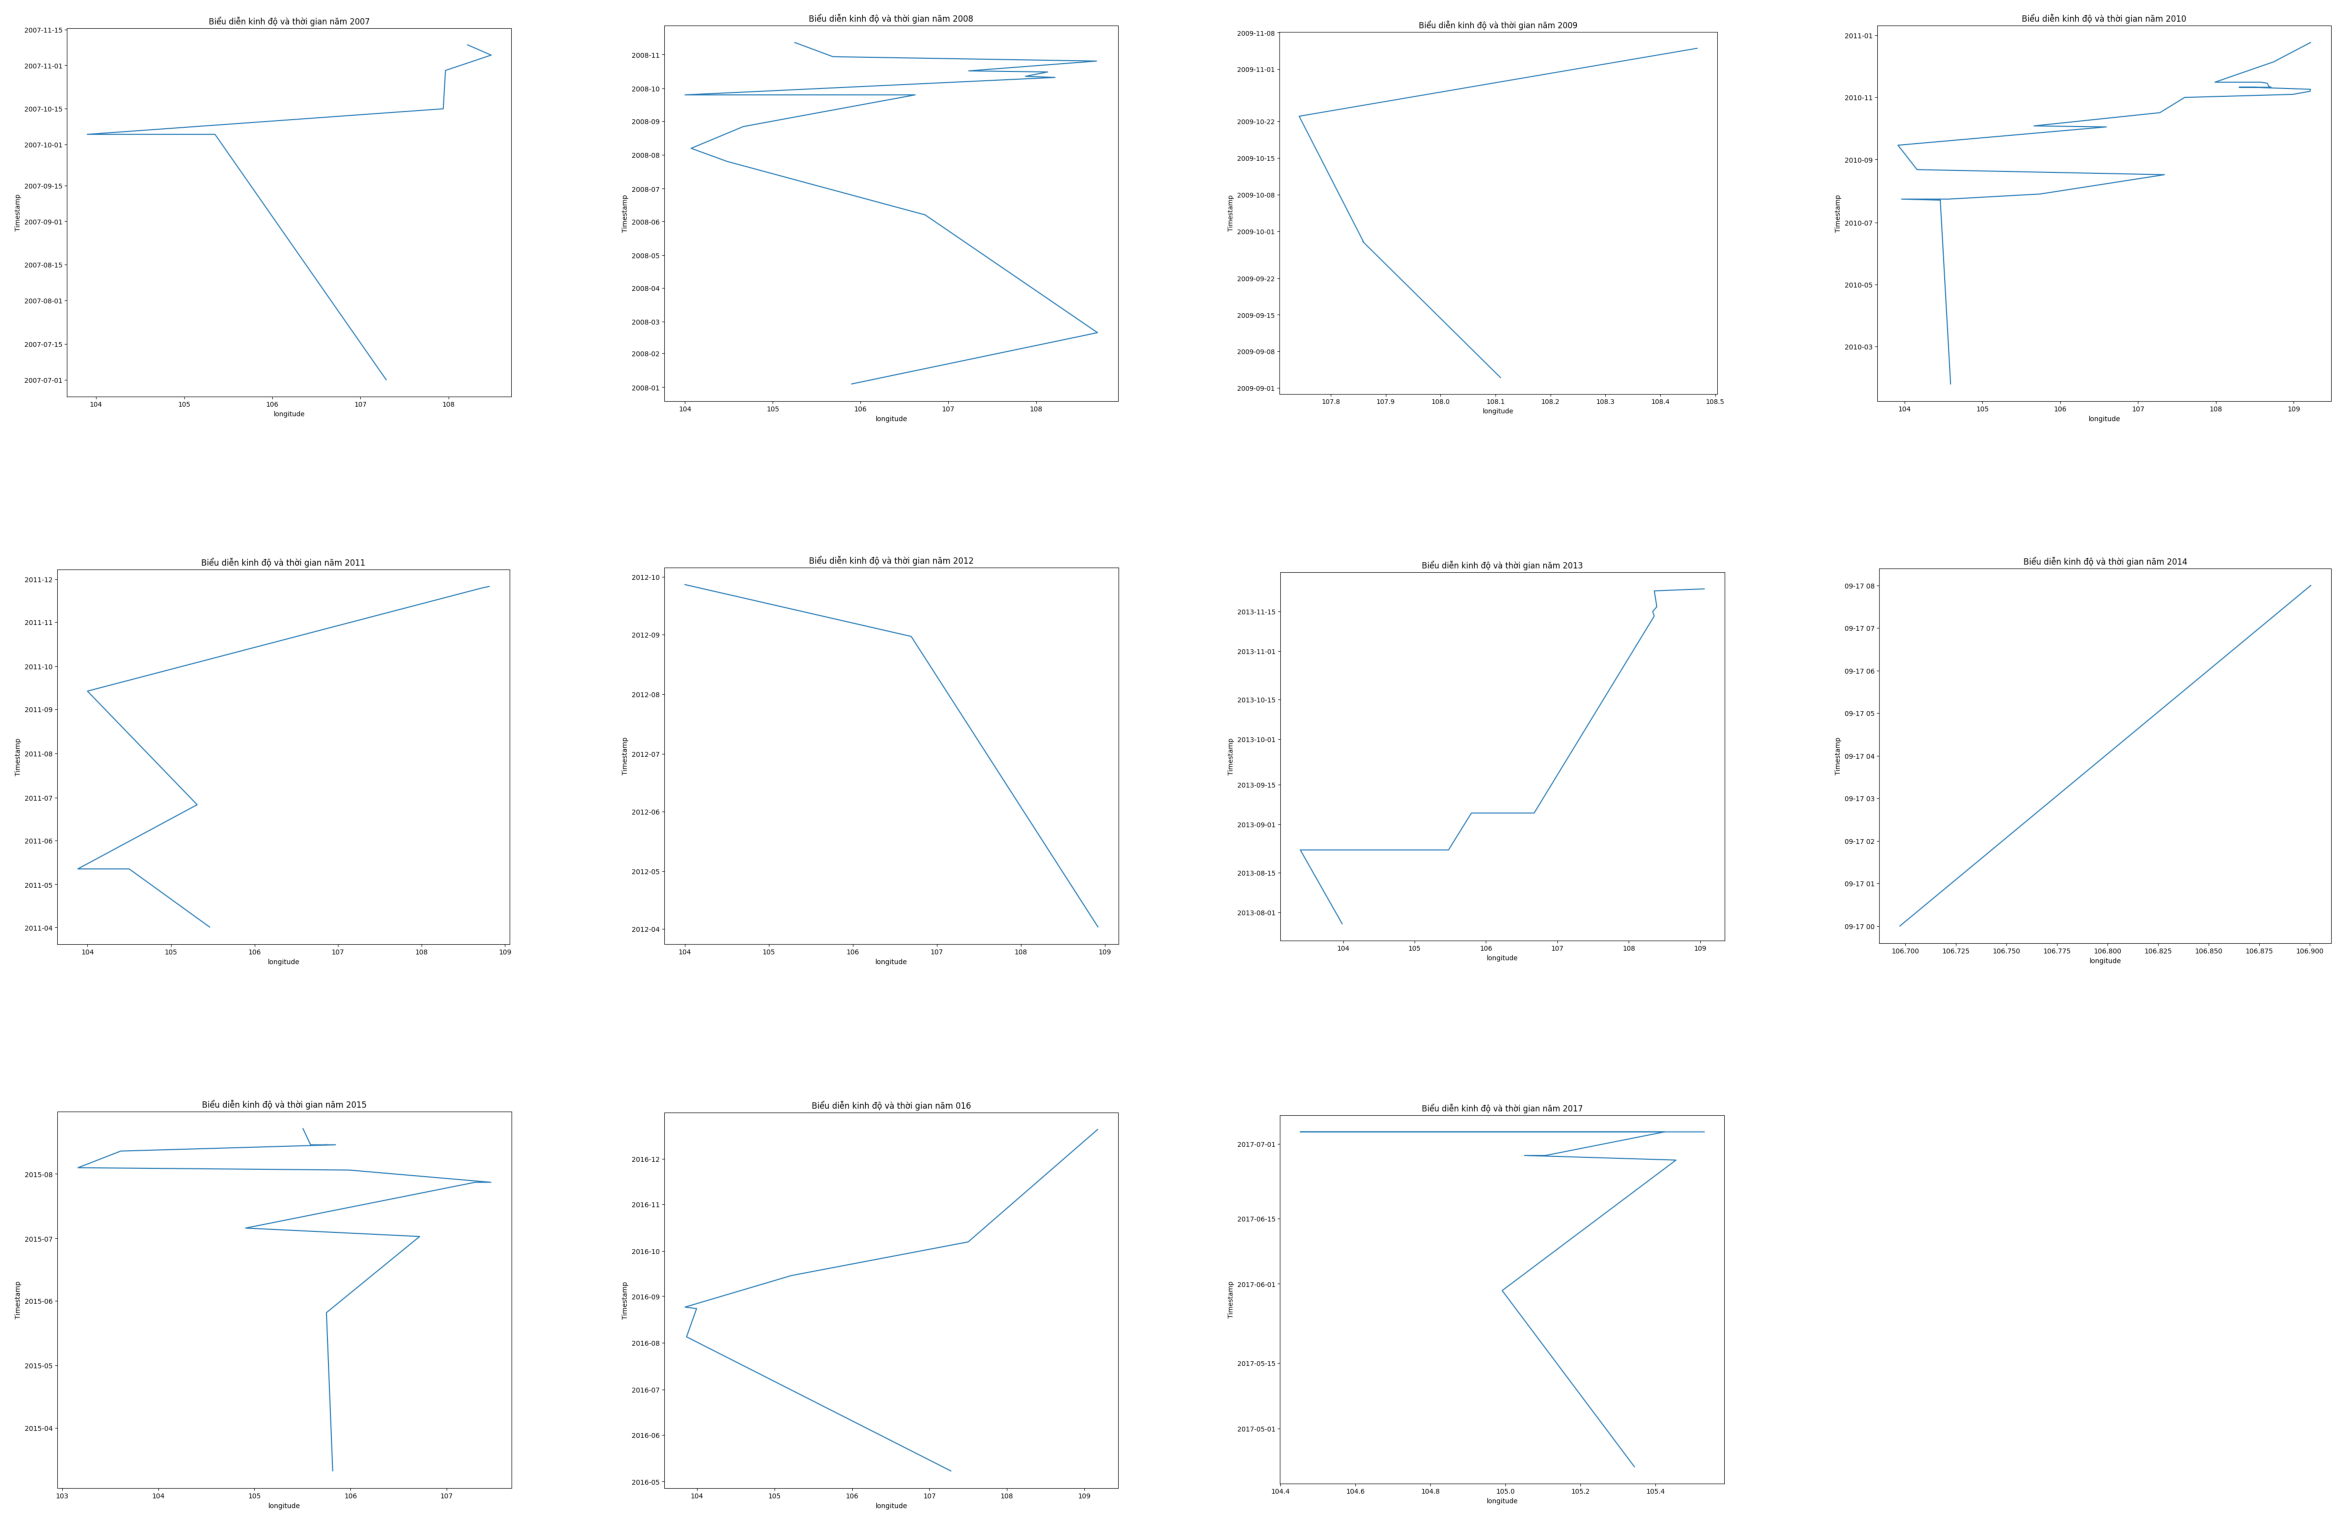

In [7]:
# for i in range(0,11,1):
#     fig = plt.figure(figsize=(12, 10))
#     plt.plot(df_year[i]["longitude"], df_year[i]["event_date"])
#     plt.xlabel("longitude")  # add X-axis label 
#     plt.ylabel("Timestamp")  # add Y-axis label 
#     plt.title(f"Biểu diễn kinh độ và thời gian năm " + list_year[i])  # add title 
#     plt.savefig(f'longtitude{list_year[i]}.png', bbox_inches='tight')
#     plt.show()
    
plt.figure(figsize=(30,20))
for i in range(0,11,1):
    plt.subplot(3,4,i+1)
    plt.imshow(mpimg.imread(f'longtitude{list_year[i]}.png'))
    plt.box(False)
    plt.axis('off')
# plt.subplot(3,4,1)
# plt.imshow(mpimg.imread('missingmatrixtotal.png'))

# plt.subplot(3,4,2)
# plt.imshow(mpimg.imread('missingbartotal.png'))

# plt.subplot(3,4,3)
# plt.imshow(mpimg.imread('missingheatmaptotal.png'))

# plt.subplot(1,4,4)
# plt.imshow(mpimg.imread('missingcorrelationtotal.png'))
# plt.show()
    # tháng 7 đi xuống tháng 10 đi lên

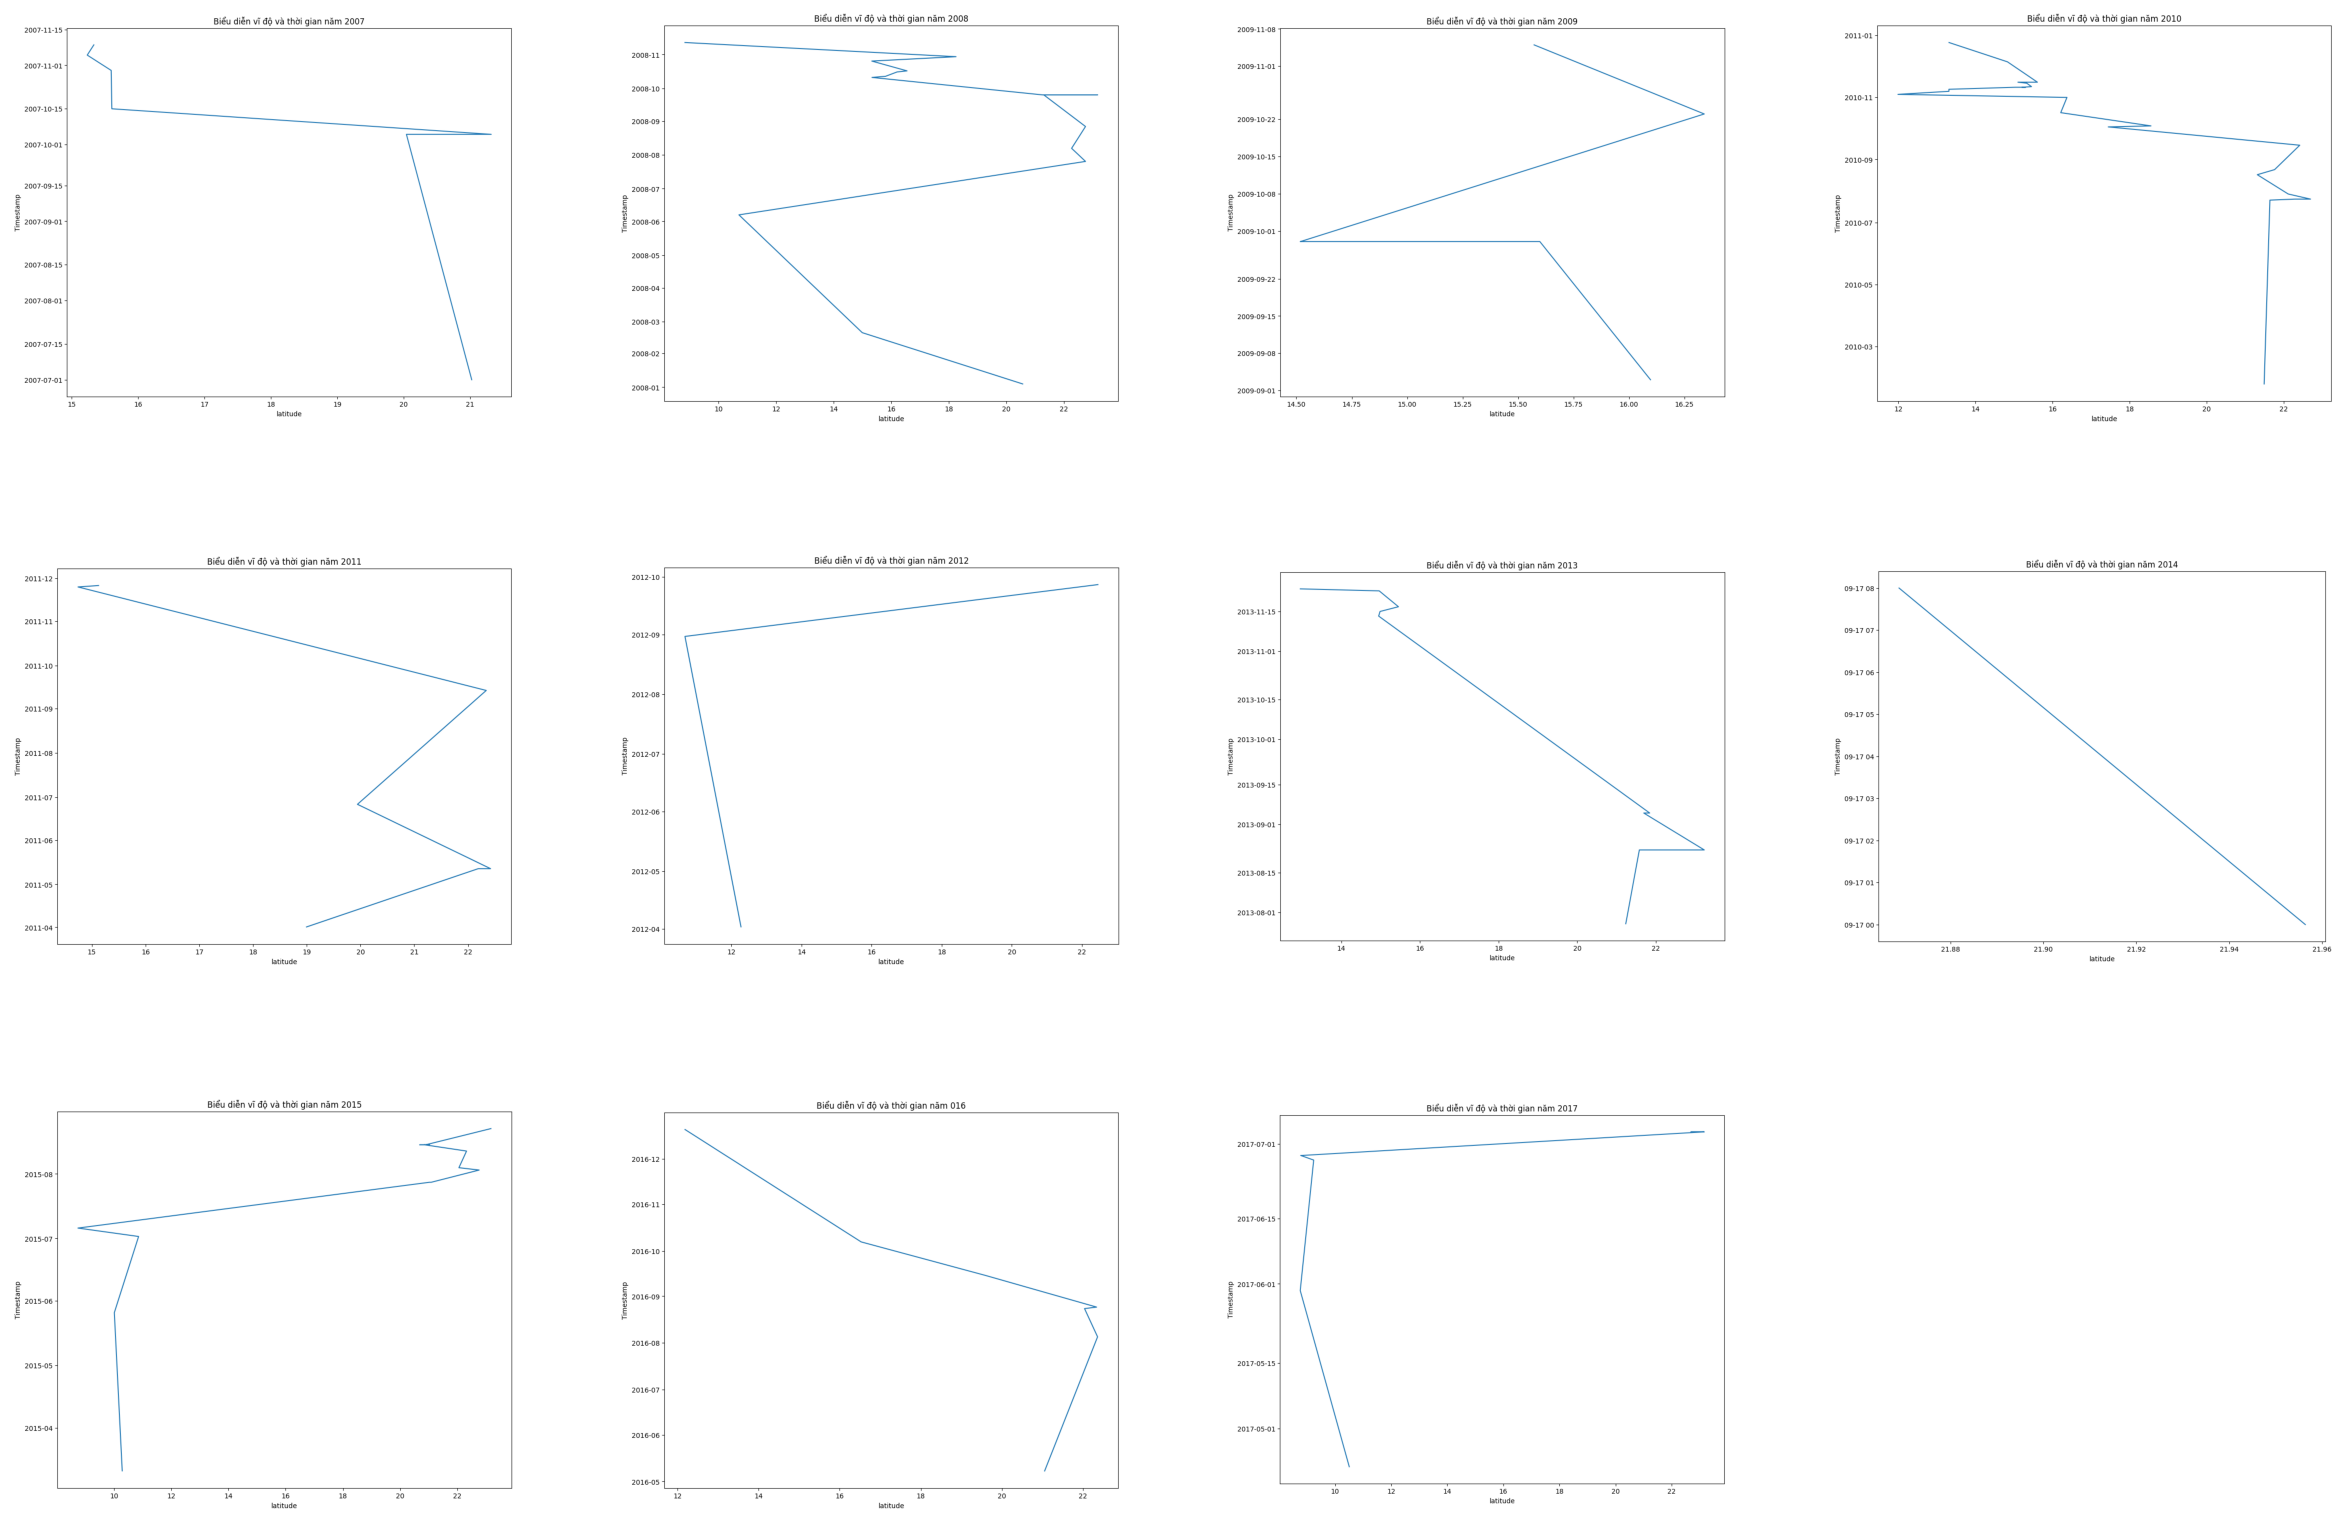

In [8]:
# for i in range(0,11,1):
#     fig = plt.figure(figsize=(12, 10))
#     plt.plot(df_year[i]["latitude"], df_year[i]["event_date"])
#     plt.xlabel("latitude")  # add X-axis label 
#     plt.ylabel("Timestamp")  # add Y-axis label 
#     plt.title(f"Biểu diễn vĩ độ và thời gian năm " + list_year[i])  # add title 
#     plt.savefig(f'latitude{list_year[i]}.png', bbox_inches='tight')
#     plt.show()
    
plt.figure(figsize=(30,20))
for i in range(0,11,1):
    plt.subplot(3,4,i+1)
    plt.imshow(mpimg.imread(f'latitude{list_year[i]}.png'))
    plt.box(False)
    plt.axis('off')
# plt.subplot(3,4,1)
# plt.imshow(mpimg.imread('missingmatrixtotal.png'))

# plt.subplot(3,4,2)
# plt.imshow(mpimg.imread('missingbartotal.png'))

# plt.subplot(3,4,3)
# plt.imshow(mpimg.imread('missingheatmaptotal.png'))

# plt.subplot(1,4,4)
# plt.imshow(mpimg.imread('missingcorrelationtotal.png'))
# plt.show()

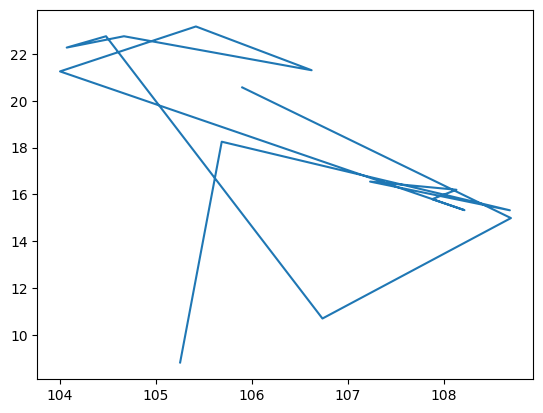

In [9]:
plt.plot(df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2008])]["longitude"],df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2008])]["latitude"] )
plt.show()

In [13]:
import requests

x = requests.get('https://data.nasa.gov/api/views/dd9e-wu2v/rows.json?accessType=DOWNLOAD')
data = x.json()

In [16]:
type(data)

dict

In [55]:
dfs = pd.read_csv("Global_Landslide_Catalog_Export.csv")
dfs

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,rain,medium,natural_slope,27.0,0.0,NaN,http://img.jakpost.net/c/2017/04/02/2017_04_02...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,other,small,natural_slope,2.0,0.0,NaN,NaN,Nallah is a steep narrow valley.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,unknown,small,urban,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
1103

In [59]:
df_country_Vietnam_2017_2019 = dfs.loc[lambda df: dfs['country_name'] == 'Vietnam', :].loc[:, ['event_date',"longitude", "latitude","landslide_size"]].sort_values("event_date")

In [66]:
df_country_Vietnam_2017_2019["landslide_size"].isnull().sum()

0